In [12]:
import pandas as pd

In [13]:
# Cargar los datasets de vino blanco y vino rojo
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')


In [14]:
# Añadir una columna para indicar el tipo de vino: 0 para tinto y 1 para blanco
df_red['type'] = 0
df_white['type'] = 1

In [15]:
# Combinar ambos datasets en uno solo
df_wine_combined = pd.concat([df_red, df_white], ignore_index=True)

In [16]:
# Mostrar las primeras filas y estadísticas descriptivas básicas del dataset combinado
display_data = {
    "Primeras Filas": df_wine_combined.head(),
    "Estadísticas Descriptivas": df_wine_combined.describe()
}

display_data["Estadísticas Descriptivas"]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# Detalle
El dataset combinado de calidad de vinos incluye tanto vinos tintos como blancos, con un total de 6497 muestras. Cada muestra tiene características físico-químicas como la acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre y total, densidad, pH, sulfatos, alcohol, y una calificación de calidad que varía de 3 a 9. Además, hemos añadido una columna type para diferenciar entre vinos tintos (0) y blancos (1).

Aunque los datos parecen estar ya en un formato adecuado para el análisis, realizaremos los siguientes pasos de preprocesamiento:

1. Revisión de Valores Nulos: Verificar si existen valores nulos en el dataset.
2. Transformación de la Variable Objetivo: Convertir la calificación de calidad numérica en categorías (baja, alta) para facilitar la clasificación.
3. Normalización: Aplicar normalización a las características para asegurar que todas estén en la misma escala, lo cual es especialmente útil para modelos que dependen de la distancia entre los puntos de datos.


Posteriormente, dividiremos el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).


Entrenaremos un modelo de clasificación, en este caso, regresión logística, para predecir la categoría de calidad del vino y evaluaremos su rendimiento utilizando métricas como precisión, recall y F1-score.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder   # Para convertir etiquetas de texto a valores numéricos
from sklearn.linear_model import LogisticRegression  # El modelo de regresión logística para clasificación
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import accuracy_score, classification_report  # Para evaluar el rendimiento del modelo

le = LabelEncoder()

# Revisar si hay valores nulos en el dataset
valores_nulos = df_wine_combined.isnull().sum().sum()

# Transformar la calificación de calidad en categorías (ya implementado anteriormente)
df_wine_combined['quality_label'] = pd.cut(df_wine_combined['quality'],
                                                  bins=[0, 6, 10],
                                                  labels=['baja', 'alta'])


# Codificar las etiquetas de calidad en valores numéricos
df_wine_combined['quality_encoded'] = le.fit_transform(df_wine_combined['quality_label'])

# Separar las características y la variable objetivo
X = df_wine_combined.drop(['quality', 'quality_label', 'quality_encoded'], axis=1)
y = df_wine_combined['quality_encoded']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que incluya la normalización de los datos y el modelo de regresión logística
modelo_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Entrenar el modelo
modelo_pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba y calcular métricas
y_pred_combined = modelo_pipeline.predict(X_test)
precision_combined = accuracy_score(y_test, y_pred_combined)
reporte_clasificacion_combined = classification_report(y_test, y_pred_combined, target_names=le.classes_)

resultados_df = pd.DataFrame({
    "Métrica": ["Valores Nulos en el Dataset", "Precisión del Modelo"],
    "Valor": [valores_nulos, f"{precision_combined:.2%}"]
})

# Mostrar el DataFrame de resultados
print("Resultados del Análisis:")
print(resultados_df.to_string(index=False), "\n")

# Mostrar el informe de clasificación como texto estructurado
print("Informe de Clasificación:")
print(reporte_clasificacion_combined)


Resultados del Análisis:
                    Métrica  Valor
Valores Nulos en el Dataset      0
       Precisión del Modelo 82.85% 

Informe de Clasificación:
              precision    recall  f1-score   support

        alta       0.63      0.27      0.38       252
        baja       0.85      0.96      0.90      1048

    accuracy                           0.83      1300
   macro avg       0.74      0.62      0.64      1300
weighted avg       0.80      0.83      0.80      1300



Tras ajustar las categorías de calidad a dos niveles ("alta" y "baja") y entrenar el modelo de clasificación, hemos obtenido una precisión del 82.85% en el conjunto de prueba. El informe de clasificación proporciona más detalles sobre el rendimiento del modelo:

La precisión para los vinos de alta calidad es del 63%, con un recall del 27% y un F1-score del 38%.
La precisión para los vinos de baja calidad es considerablemente más alta, alcanzando el 85%, con un recall del 96% y un F1-score del 90%.
Estos resultados sugieren que el modelo es bastante bueno para identificar vinos de baja calidad, lo cual se refleja en el alto valor de precisión y recall para esta categoría. Sin embargo, el modelo tiene dificultades para clasificar con precisión los vinos de alta calidad, como lo indica el menor recall y F1-score en esta categoría.

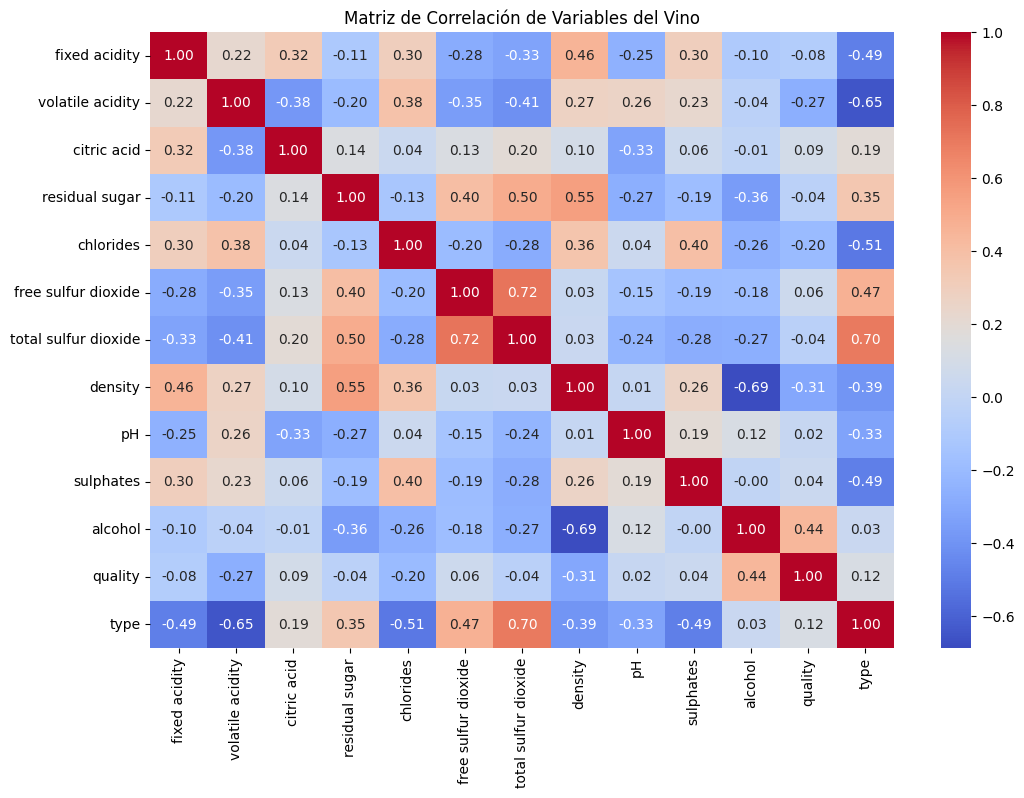

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar las columnas numéricas
columns_numericas = df_wine_combined.select_dtypes(include=['number']).columns.tolist()

# Excluir columnas específicas que no queremos incluir en la matriz de correlación
columns_to_exclude = ['quality_encoded', 'quality_binary_encoded']
columns_for_correlation = [col for col in columns_numericas if col not in columns_to_exclude]

# Calcular la matriz de correlación solo con las columnas numéricas deseadas
correlation_matrix = df_wine_combined[columns_for_correlation].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de Variables del Vino')
plt.show()


In [26]:
from dash import dcc, html, Input, Output, Dash
import pandas as pd
import plotly.graph_objs as go

# Suponiendo que 'modelo_pipeline' es tu objeto de modelo entrenado y listo para hacer predicciones.

# Crea una aplicación Dash
app = Dash(__name__)

# Define el layout de la aplicación
app.layout = html.Div([
    html.H1("Predicción de Calidad de Vino"),
    html.Label("Acidez volátil:"),
    dcc.Input(id='volatile_acidity', type='number', value=0.3),
    html.Label("Alcohol:"),
    dcc.Input(id='alcohol', type='number', value=10),
    html.Label("Sulfatos:"),
    dcc.Input(id='sulphates', type='number', value=0.5),
    html.Label("Tipo (0 para tinto, 1 para blanco):"),
    dcc.Input(id='type', type='number', value=0),
    html.Button('Predecir Calidad', id='submit_val', n_clicks=0),
    html.Div(id='container_button_basic')
])

# Define las callbacks para interactividad
@app.callback(
    Output('container_button_basic', 'children'),
    [Input('submit_val', 'n_clicks')],
    [Input('volatile_acidity', 'value'), Input('alcohol', 'value'), 
     Input('sulphates', 'value'), Input('type', 'value')]
)
def update_output(n_clicks, volatile_acidity, alcohol, sulphates, type_input):
    if n_clicks > 0:
        features = pd.DataFrame([[volatile_acidity, alcohol, sulphates, type_input]], 
                                columns=['volatile_acidity', 'alcohol', 'sulphates', 'type'])
        # Usa tu 'modelo_pipeline' para hacer una predicción basada en las características
        prediction = y_pred_combined.predict(features)
        quality = 'Alta' if prediction[0] == 1 else 'Baja'
        return f'La calidad del vino predicha es: {quality}'
    else:
        return 'Ingrese las características y haga clic en Predecir Calidad.'

# Ejecutar el servidor
if __name__ == '__main__':
    app.run_server(mode="inline")
